In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
conn = sqlite3.connect(r"D:\northwind_project\northwind-SQLite3-main\dist\northwind.db")

customers = pd.read_sql("SELECT * FROM Customers", conn)
orders = pd.read_sql("SELECT * FROM Orders", conn)
products = pd.read_sql("SELECT * FROM Products", conn)


In [24]:
order_details = pd.read_sql("SELECT * FROM [Order Details]", conn)

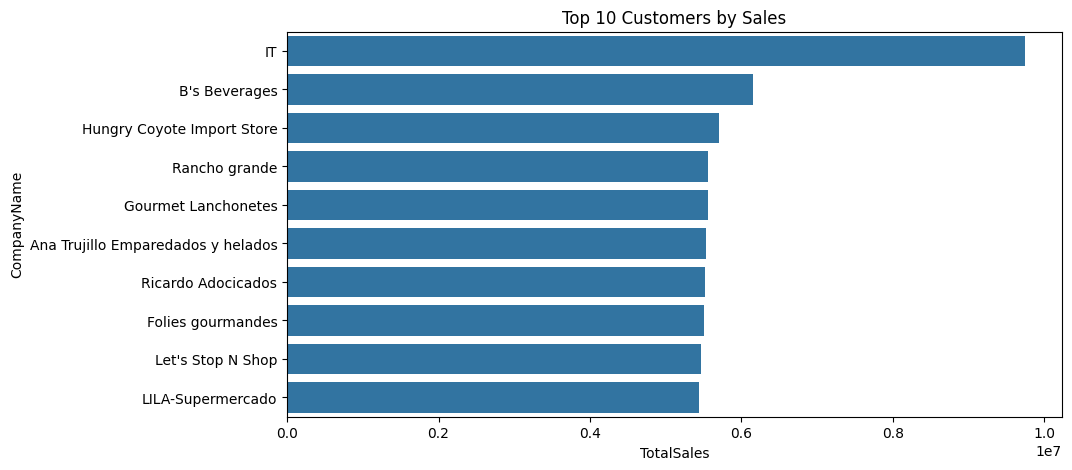

In [26]:
query = """
SELECT c.CompanyName,
       SUM(od.UnitPrice * od.Quantity) AS TotalSales
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY c.CompanyName
ORDER BY TotalSales DESC
LIMIT 10;
"""
top_customers = pd.read_sql(query, conn)

plt.figure(figsize=(10,5))
sns.barplot(x='TotalSales', y='CompanyName', data=top_customers)
plt.title("Top 10 Customers by Sales")
plt.show()


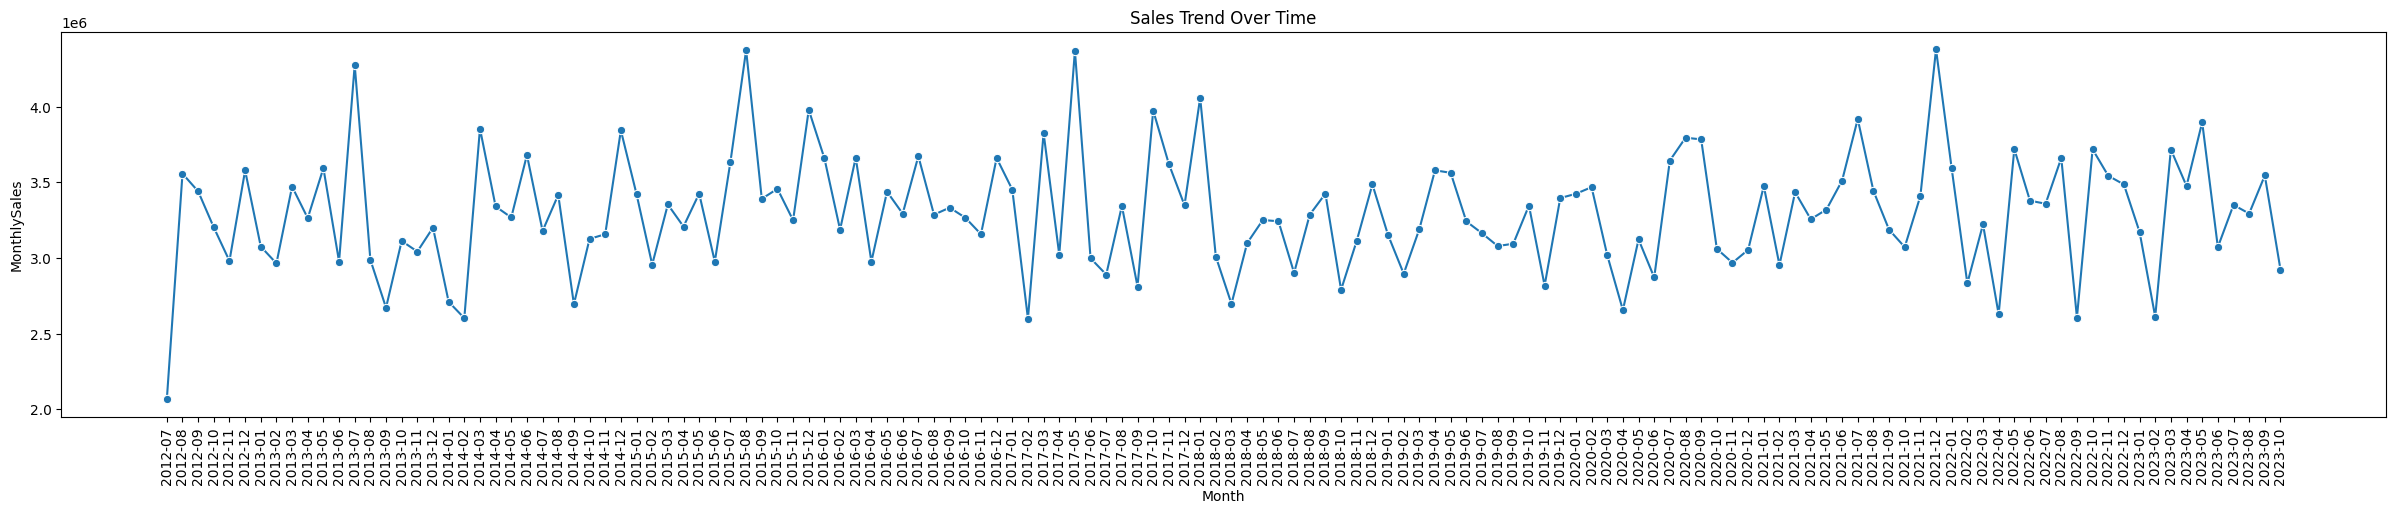

In [33]:
sales_trend = pd.read_sql("""
SELECT strftime('%Y-%m', o.OrderDate) AS Month,
       SUM(od.UnitPrice * od.Quantity) AS MonthlySales
FROM Orders o
JOIN [Order Details] od ON o.OrderID = od.OrderID
GROUP BY Month
ORDER BY Month;
""", conn)

plt.figure(figsize=(30,5))
sns.lineplot(x='Month', y='MonthlySales', data=sales_trend, marker='o')
plt.xticks(rotation=90)
plt.title("Sales Trend Over Time")
plt.show()
